# Statistics For Machine Learning Mini Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import random
from scipy.stats import shapiro, levene
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
import statistics

## 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset  consists of player information which includes height , weight overall rating , potential etc. Data Cleaning and basic EDA process need to be performed.

In [2]:
data = pd.read_csv('fifa_stats.csv')
data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


### a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In [3]:
n = 200
sam_mean = np.mean(data.Age)
sigma = np.std(data.Age)
std_error = sigma/np.sqrt(n)
print("Sample Mean : " , sam_mean)
print("Standard Deviation : " , sigma)
print("Standard Error : " , std_error)

Sample Mean :  27.2315
Standard Deviation :  3.8580963894127795
Standard Error :  0.2728086119425111


In [4]:
pop_mean = np.mean(data)
pop_mean

Age                          27.231500
Overall_rating               78.197000
Potential                    80.303500
International Reputation      1.774500
Weak Foot                     3.204000
Skill Moves                   2.919500
Jersey Number                15.205500
Height                        5.781042
Weight                      169.478000
dtype: float64

In [5]:
pe = np.mean(len(data))
pe

2000.0

In [6]:
sam_error = abs(pop_mean - pe)
sam_error

Age                         1972.768500
Overall_rating              1921.803000
Potential                   1919.696500
International Reputation    1998.225500
Weak Foot                   1996.796000
Skill Moves                 1997.080500
Jersey Number               1984.794500
Height                      1994.218958
Weight                      1830.522000
dtype: float64

In [7]:
# As the sample size n, gets larger and larger, the sample means tend to follow a normal distribution which eventually tends to cluster around the true population mean

### b) Is there any evidence that the players overall rating is greater than 80?

In [8]:
np.mean(data.Overall_rating)

78.197

In [9]:
# No there is no evidence that players overall rating is greater than 80.

### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also perform the graphical analysis.

In [10]:
data['Preferred Foot'].value_counts() #cateogrical 

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [11]:
data['Potential'].mean()

80.3035

In [12]:
crit_f= st.f.isf(0.05, dfn=1,dfd=1533)
crit_f

3.8475318999808428

In [13]:
test_stat, pvalue= st.f_oneway(data[data['Preferred Foot']=='Right']['Potential'],
                                 data[data['Preferred Foot']=='Left']['Potential'])
test_stat

2.3648403497065615

In [14]:
# test_stat<crit_f, we fail to reject the null

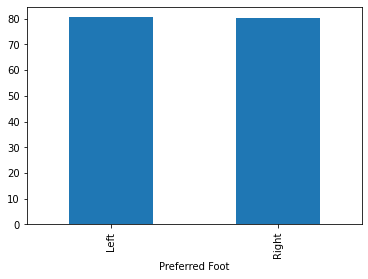

In [15]:
data.groupby('Preferred Foot')['Potential'].mean().plot(kind='bar')
plt.show()

In [16]:
# Accordimg to graphical representation we can say that preferred foot does not any impact on potential.

### d) Perform the statistical test to identify relation between the overall rating and potential. [Assume both are continuous data points].

In [17]:
n_1= len('Overall_rating')
n_2= len('Potential')

df= (n_1+n_2)-2

In [18]:
df

21

In [19]:
time= data.Overall_rating + data.Potential

In [20]:
stat,pvalue=shapiro(time)
pvalue

3.8701190776246645e-31

In [21]:
stat,pvalue= levene(data.Overall_rating, data.Potential)
pvalue

3.4406841059319607e-32

In [22]:
tstat, pvalue= st.ttest_ind(data.Overall_rating,data.Potential) 
# by default its given a two sided pvalue, so for one tail test, we need to divide the pvalue by 2

tstat,pvalue/2

(-17.89175319557915, 3.120802155468191e-69)

In [23]:
t_crit= st.t.ppf(0.1, df=21)
t_crit

-1.3231878738651726

In [24]:
# pvalue approach 0.006<0.10 (alpha inferred from the question), reject the null
# tstat < t_crit, reject the null

### e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

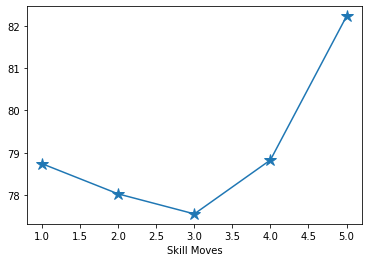

In [27]:
data.groupby('Skill Moves')['Overall_rating'].mean().plot(marker = '*' , markersize = 12)
plt.show()

#### Note : 
#### 1) Perform all the statistical analysis with 5%(Significance Level).
#### 2) Perform the test of normality and test of variance in the appropriate places.

## 2. Perform the following statistical analysis on the mobile network dataset given. The given dataset contais information about the internet , calls , messages of various network.Data Cleaning and basic EDA process need to be performed.

In [28]:
df = pd.read_csv('phone.csv')
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the intervals are wider? Interpret the results.

In [29]:
n = len(df)
sam_mean = np.mean(df.duration)
sigma = np.std(df.duration)
alpha = (1-0.95)/2

In [30]:
zalphaby2 = st.norm.isf(alpha)

In [31]:
me = zalphaby2 * (sigma/np.sqrt(n))

In [32]:
print("At 95% CI the average duration calls made by all the network is " , np.round(sam_mean + me , 4) , np.round(sam_mean - me , 4))

At 95% CI the average duration calls made by all the network is  147.4301 141.1797


In [33]:
n = len(df)
sam_mean = np.mean(df.duration)
sigma = np.std(df.duration)
alpha = (1-0.99)/2

In [34]:
zalphaby2 = st.norm.isf(alpha)

In [35]:
me = zalphaby2 * (sigma/np.sqrt(n))

In [36]:
print("At 99% CI the average duration calls made by all the network is " , np.round(sam_mean + me , 4) , np.round(sam_mean - me , 4))

At 99% CI the average duration calls made by all the network is  148.4121 140.1977


### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [37]:
df['network'].value_counts() #cateogrical 

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

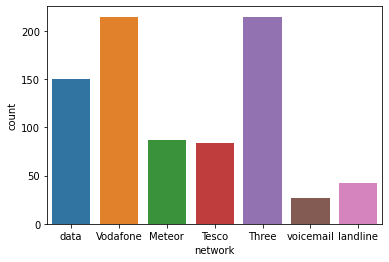

In [38]:
sns.countplot(data = df , x = 'network')
plt.show()

In [39]:
# Networks are not equally distributed.

### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

In [40]:
df.groupby('network')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
network,,,,,,,,
Meteor,87.0,139.757012,46.886445,21.456720,110.748469,134.089250,173.984727,249.265924
Tesco,84.0,145.287504,47.187879,42.387325,112.281929,146.733204,177.504493,268.443922
Three,215.0,141.457941,44.744397,14.173899,111.054649,142.534191,173.638137,260.813244
Vodafone,215.0,149.606272,46.912294,43.247843,111.652249,149.709940,183.478712,268.343460
data,150.0,140.968643,41.417421,0.993514,119.070227,143.303965,166.027534,268.458090
landline,42.0,141.617641,46.278411,36.796316,116.794170,131.949186,169.973155,227.442595
voicemail,27.0,159.073841,53.833422,72.779644,118.444467,172.219221,195.071192,264.422909


In [41]:
alpha=0.05
Meteor = df[df.network=='Meteor']['duration']
Tesco = df[df.network=='Tesco']['duration']
Three = df[df.network=='Three']['duration']
Vodafone = df[df.network=='Vodafone']['duration']
data = df[df.network=='data']['duration']
landline = df[df.network=='landline']['duration']
voicemail = df[df.network=='voicemail']['duration']

In [42]:
st.f_oneway(Meteor,Tesco,data,landline,voicemail)

F_onewayResult(statistic=1.0963813524629218, pvalue=0.3579913400075824)

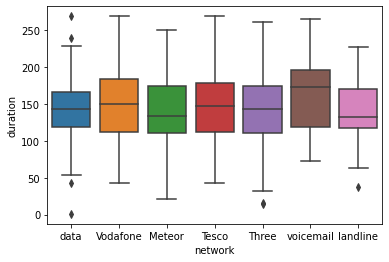

In [43]:
sns.boxplot(df.network,df.duration)
plt.show()

In [44]:
# Duration mean for all the networks is near 150.Therefore we can say that the data is equally distributed.

### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [45]:
df['item'].value_counts() #cateogrical 

call    388
sms     282
data    150
Name: item, dtype: int64

In [46]:
df['duration'].mean()

144.30493555983546

In [47]:
crit_f= st.f.isf(0.05, dfn=2,dfd=668)
crit_f

3.0092072786430544

In [48]:
test_stat, pvalue= st.f_oneway(df[df['item']=='call']['duration'],
                                 df[df['item']=='sms']['duration'],
                                 df[df['item']=='data']['duration'])
test_stat

1.9313964906864995

In [49]:
# test_stat<crit_f, we fail to reject the null

### e) Perform statistical tests to identify the relation between network and network type.

In [50]:
table = pd.crosstab(df.network,df.network_type)
table

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [51]:
st.chi2_contingency(table)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [52]:
st.chi2.isf(0.05,18)

28.869299430392637

In [53]:
st.chi2.sf(2460.0,18)

0.0

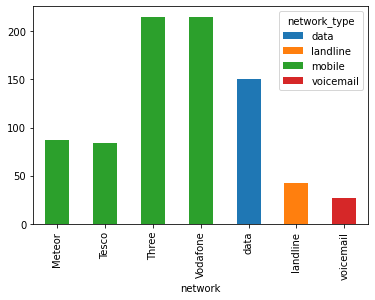

In [54]:
pd.crosstab(df['network'] , df['network_type']).plot(kind= 'bar' ,stacked = True )
plt.show()

#### Note :
#### 1) Perform all the statistical analysis with 5%(Significance Level).
#### 2) Perform the test of normality and test of variance in the appropriate places.